In [270]:
import re
import pandas as pd

In [271]:
f = open('Whatsapp Chat Placement Cell CE 25.txt','r',encoding = 'utf-8')

In [272]:
data = f.read()

In [273]:
print(data)

[22/06/23, 10:41:44] Placement Cell, CE Batch 2k25: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[22/06/23, 10:41:44] Rajneesh Pathak IIEST: ‎Rajneesh Pathak IIEST created this group
[23/06/23, 11:23:13] Placement Cell, CE Batch 2k25: ‎You joined using this group's invite link
[23/06/23, 11:25:48] Dheeraj Gaur CE IIEST: ‎Dheeraj Gaur CE IIEST joined using this group's invite link
[23/06/23, 11:34:36] ~ OINDRILA DAS 😁💬: ‎~ OINDRILA DAS 😁💬 joined using this group's invite link
[23/06/23, 12:07:14] Shraddha Gawhade: ‎Shraddha Gawhade joined using this group's invite link
[23/06/23, 13:20:10] Protik Saha Palash CE IIEST: ‎Protik Saha Palash CE IIEST joined using this group's invite link
[24/06/23, 00:37:13] Joyanta IIEST: It’s our unfortunate that our socce isn’t active like other society.
Socce hadn’t publish the placement record, internship record, Gate rankers thoroughly.
It’s our request to PR’s that please do

In [274]:
pattern = r'\[\d{2}/\d{2}/\d{2}, \d{2}:\d{2}:\d{2}\] '

In [275]:
messages = re.split(pattern, data)[1:]
messages

['Placement Cell, CE Batch 2k25: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 'Rajneesh Pathak IIEST: \u200eRajneesh Pathak IIEST created this group\n',
 "Placement Cell, CE Batch 2k25: \u200eYou joined using this group's invite link\n",
 "Dheeraj Gaur CE IIEST: \u200eDheeraj Gaur CE IIEST joined using this group's invite link\n",
 "~\u202fOINDRILA DAS 😁💬: \u200e~\u202fOINDRILA DAS 😁💬 joined using this group's invite link\n",
 "Shraddha Gawhade: \u200eShraddha Gawhade joined using this group's invite link\n",
 "Protik Saha Palash CE IIEST: \u200eProtik Saha Palash CE IIEST joined using this group's invite link\n",
 'Joyanta IIEST: It’s our unfortunate that our socce isn’t active like other society.\nSocce hadn’t publish the placement record, internship record, Gate rankers thoroughly.\nIt’s our request to PR’s that please don’t the same as previous. \nWe have to active our society. \nWe will publish 

In [276]:
dates = re.findall(pattern, data)
dates

['[22/06/23, 10:41:44] ',
 '[22/06/23, 10:41:44] ',
 '[23/06/23, 11:23:13] ',
 '[23/06/23, 11:25:48] ',
 '[23/06/23, 11:34:36] ',
 '[23/06/23, 12:07:14] ',
 '[23/06/23, 13:20:10] ',
 '[24/06/23, 00:37:13] ',
 '[24/06/23, 00:37:49] ',
 '[24/06/23, 00:38:13] ',
 '[24/06/23, 00:38:35] ',
 '[24/06/23, 00:39:37] ',
 '[24/06/23, 00:39:52] ',
 '[24/06/23, 00:40:13] ',
 '[24/06/23, 00:40:19] ',
 '[24/06/23, 00:40:26] ',
 '[24/06/23, 00:40:52] ',
 '[24/06/23, 00:41:24] ',
 '[24/06/23, 10:32:50] ',
 '[24/06/23, 10:39:18] ',
 '[24/06/23, 10:41:16] ',
 '[24/06/23, 10:41:30] ',
 '[24/06/23, 11:02:32] ',
 '[24/06/23, 11:11:02] ',
 '[24/06/23, 11:11:11] ',
 '[24/06/23, 11:11:41] ',
 '[24/06/23, 11:11:49] ',
 '[24/06/23, 11:12:09] ',
 '[24/06/23, 12:12:45] ',
 '[24/06/23, 12:23:20] ',
 '[24/06/23, 13:16:06] ',
 '[24/06/23, 13:16:17] ',
 '[24/06/23, 16:27:20] ',
 '[24/06/23, 17:27:36] ',
 '[24/06/23, 17:30:57] ',
 '[24/06/23, 17:31:40] ',
 '[24/06/23, 17:32:55] ',
 '[24/06/23, 17:48:46] ',
 '[24/06/23,

In [277]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
#convert message data type
df['message_date'] = pd.to_datetime(df['message_date'], format='[%d/%m/%y, %H:%M:%S] ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,"Placement Cell, CE Batch 2k25: ‎Messages and c...",2023-06-22 10:41:44
1,Rajneesh Pathak IIEST: ‎Rajneesh Pathak IIEST ...,2023-06-22 10:41:44
2,"Placement Cell, CE Batch 2k25: ‎You joined usi...",2023-06-23 11:23:13
3,Dheeraj Gaur CE IIEST: ‎Dheeraj Gaur CE IIEST ...,2023-06-23 11:25:48
4,~ OINDRILA DAS 😁💬: ‎~ OINDRILA DAS 😁💬 joined u...,2023-06-23 11:34:36


In [278]:
df.shape

(2584, 2)

In [279]:
# separate users and messages
users = []
messages = []

for message in df['user_message']:
    # Split the message based on the first occurrence of ': ' to separate user and message
    entry = re.split(r'([\w\W]+?):\s', message, maxsplit=1)
    
    # Check if entry has at least two parts (username and message)
    if len(entry) > 2:
        # If it's a group notification but still has a user-like format
        if "\u200e" in entry[2]:  # Check for a group notification marker
            users.append('group_notification')
            messages.append(entry[2].strip())  # Add the notification message
        else:
            users.append(entry[1])  # Add the user
            messages.append(entry[2])  # Add the message
    else:
        users.append('group_notification')  # For group notifications
        messages.append(entry[0])  # Add the whole message as a notification



df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2023-06-22 10:41:44,group_notification,‎Messages and calls are end-to-end encrypted. ...
1,2023-06-22 10:41:44,group_notification,‎Rajneesh Pathak IIEST created this group
2,2023-06-23 11:23:13,group_notification,‎You joined using this group's invite link
3,2023-06-23 11:25:48,group_notification,‎Dheeraj Gaur CE IIEST joined using this group...
4,2023-06-23 11:34:36,group_notification,‎~ OINDRILA DAS 😁💬 joined using this group's i...


In [280]:
df['year']=df['date'].dt.year 

In [281]:
df.head()

,date,user,message,year
0,2023-06-22 10:41:44,group_notification,‎Messages and calls are end-to-end encrypted. ...,2023
1,2023-06-22 10:41:44,group_notification,‎Rajneesh Pathak IIEST created this group,2023
2,2023-06-23 11:23:13,group_notification,‎You joined using this group's invite link,2023
3,2023-06-23 11:25:48,group_notification,‎Dheeraj Gaur CE IIEST joined using this group...,2023
4,2023-06-23 11:34:36,group_notification,‎~ OINDRILA DAS 😁💬 joined using this group's i...,2023


In [282]:
df['month']=df['date'].dt.month_name()

In [283]:
df['day']=df['date'].dt.day

In [284]:
df['hour']=df['date'].dt.hour

In [285]:
df['minute']=df['date'].dt.minute

In [286]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-06-22 10:41:44,group_notification,‎Messages and calls are end-to-end encrypted. ...,2023,June,22,10,41
1,2023-06-22 10:41:44,group_notification,‎Rajneesh Pathak IIEST created this group,2023,June,22,10,41
2,2023-06-23 11:23:13,group_notification,‎You joined using this group's invite link,2023,June,23,11,23
3,2023-06-23 11:25:48,group_notification,‎Dheeraj Gaur CE IIEST joined using this group...,2023,June,23,11,25
4,2023-06-23 11:34:36,group_notification,‎~ OINDRILA DAS 😁💬 joined using this group's i...,2023,June,23,11,34


In [287]:
df[df['user'] == 'Dheeraj Gaur CE IIEST'].shape[0]

34

In [288]:
words = []
for message in df['message']:
    words.extend(message.split())

In [289]:
len(words)

35168

In [290]:
df[df['message'] == '\u200eimage omitted\n'].shape[0]

0

In [291]:
df[df['message'] == '\u200evideo omitted\n'].shape[0]

0

In [292]:
df[(df['message'] == '\u200eimage omitted\n') | (df['message'] == '\u200evideo omitted\n')].shape[0]

0

In [293]:
!pip install urlextract

In [294]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's www.gmail.com have URL as an example https://google.com, http://facebook.com, ftp://url.in")
print(urls)


['www.gmail.com', 'https://google.com', 'http://facebook.com', 'ftp://url.in']


In [295]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [296]:
links

['https://docs.google.com/document/d/1H4K2vsRQgQqnQFRP_6ZtvY2PYmYEOI0uu4KvqwTxijs/edit?usp=sharing',
 'https://buildyourfuture.withgoogle.com/programs/.',
 'https://meet.google.com/ksj-nziy-vpx',
 'https://youtu.be/wZN_Z-WhkxQ',
 'https://unstop.com/o/r9EPwon&utm_medium=Share&utm_source=WhatsApp',
 'B.Tech',
 'https://unstop.com/festival/flipkart-grid-50-flipkart-137316',
 'B.Tech/B.E./M.Tech/M.S',
 'https://unstop.com/o/rZf4t0w&utm_medium=Share&utm_source=WhatsApp',
 'B.Tech/BE',
 'https://unstop.com/competitions/hackrx-40-bajaj-finserv-689286?ref=HMFTRD',
 'https://unstop.com/competitions/techsurf-2023-contentstack-690413?ref=zP0eeTNI',
 'https://www.udemy.com/course/ip-addressing-zero-to-hero/?utm_source=aff-campaign&utm_medium=udemyads&LSNPUBID=RIg0ReKk7DI&ranMID=47901&ranEAID=RIg0ReKk7DI&ranSiteID=RIg0ReKk7DI-8NCu1ThpS8Q7r4GSWtOqJA&couponCode=JULY23',
 'https://video.cisco.com/detail/videos/latest-videos/video/6330194359112.',
 'https://alison.com/',
 'https://unstop.com/blog/isro

In [297]:
from urlextract import URLExtract
import re

extractor = URLExtract()
valid_url_pattern = re.compile(r'^(http|https|ftp)://|.*\.(com|org|net|in|edu|gov|co|io)')

links = []

for message in df['message']:
    found_urls = extractor.find_urls(message)
    valid_urls = [url for url in found_urls if re.match(valid_url_pattern, url)]
    links.extend(valid_urls)


In [298]:
links

['https://docs.google.com/document/d/1H4K2vsRQgQqnQFRP_6ZtvY2PYmYEOI0uu4KvqwTxijs/edit?usp=sharing',
 'https://buildyourfuture.withgoogle.com/programs/.',
 'https://meet.google.com/ksj-nziy-vpx',
 'https://youtu.be/wZN_Z-WhkxQ',
 'https://unstop.com/o/r9EPwon&utm_medium=Share&utm_source=WhatsApp',
 'https://unstop.com/festival/flipkart-grid-50-flipkart-137316',
 'https://unstop.com/o/rZf4t0w&utm_medium=Share&utm_source=WhatsApp',
 'https://unstop.com/competitions/hackrx-40-bajaj-finserv-689286?ref=HMFTRD',
 'https://unstop.com/competitions/techsurf-2023-contentstack-690413?ref=zP0eeTNI',
 'https://www.udemy.com/course/ip-addressing-zero-to-hero/?utm_source=aff-campaign&utm_medium=udemyads&LSNPUBID=RIg0ReKk7DI&ranMID=47901&ranEAID=RIg0ReKk7DI&ranSiteID=RIg0ReKk7DI-8NCu1ThpS8Q7r4GSWtOqJA&couponCode=JULY23',
 'https://video.cisco.com/detail/videos/latest-videos/video/6330194359112.',
 'https://alison.com/',
 'https://unstop.com/blog/isro-vssc-internship-2023',
 'https://www.tata.com/caree

In [299]:
df

,date,user,message,year,month,day,hour,minute
0,2023-06-22 10:41:44,group_notification,‎Messages and calls are end-to-end encrypted. ...,2023,June,22,10,41
1,2023-06-22 10:41:44,group_notification,‎Rajneesh Pathak IIEST created this group,2023,June,22,10,41
2,2023-06-23 11:23:13,group_notification,‎You joined using this group's invite link,2023,June,23,11,23
3,2023-06-23 11:25:48,group_notification,‎Dheeraj Gaur CE IIEST joined using this group...,2023,June,23,11,25
4,2023-06-23 11:34:36,group_notification,‎~ OINDRILA DAS 😁💬 joined using this group's i...,2023,June,23,11,34
...,...,...,...,...,...,...,...,...
2579,2024-09-05 14:02:27,~ Tanya,LTIMindtree\nPPT - 6th sept. 12noon onwards\nO...,2024,September,5,14,2
2580,2024-09-06 11:18:29,~ Ayush Chandram,Anyone who got rejection mail from Accenture d...,2024,September,6,11,18
2581,2024-09-06 19:34:04,Rajneesh Pathak IIEST,"The deadline for cognizant is today only, fill...",2024,September,6,19,34
2582,2024-09-06 20:19:26,Rajneesh Pathak IIEST,"Attn: All Applicants\n\n""Following our persuas...",2024,September,6,20,19


In [300]:
!pip install matplotlib

In [301]:
import matplotlib.pyplot as plt

In [302]:
x = df['user'].value_counts().head()

In [303]:
name = x.index
count = x.values

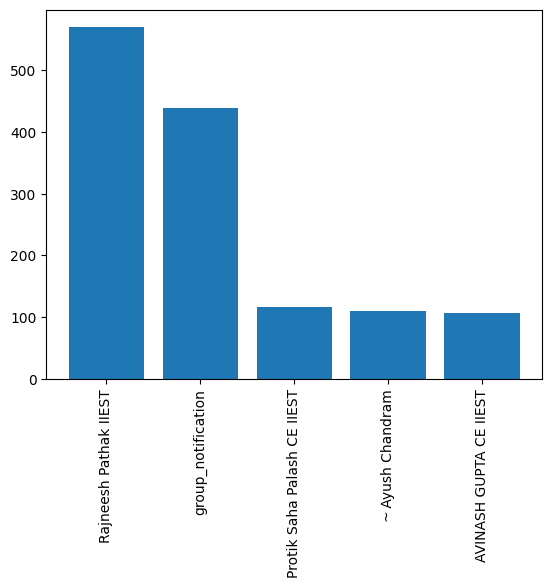

In [304]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [305]:
round((df['user'].value_counts().head()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,percent,count
0,Rajneesh Pathak IIEST,22.02
1,group_notification,16.99
2,Protik Saha Palash CE IIEST,4.49
3,~ Ayush Chandram,4.26
4,AVINASH GUPTA CE IIEST,4.14


In [334]:
temp = df[df['user'] != 'group_notification']
temp = temp[~temp['message'].isin(['\u200eimage omitted', '\u200evideo omitted', '\u200esticker omitted'])]

In [340]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

.
..
...
,
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
co

In [341]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [342]:
!pip install Counter

In [343]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,students,134
1,internship,124
2,company,80
3,congratulations,76
4,@916388835788,75
5,placement,73
6,hrm,69
7,dtpc,60
8,companies,59
9,mail,57


In [344]:
!pip install emoji

In [345]:
import emoji

In [352]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [353]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🥳,56
1,🎉,38
2,😂,37
3,✨,31
4,📢,28
...,...,...
71,🗿,1
72,💗,1
73,😶,1
74,🤏,1


In [354]:
df['month_num'] = df['date'].dt.month

In [359]:
timeline = df.groupby(['year','month_num', 'month']).count()['message'].reset_index()

In [360]:
timeline

,year,month_num,month,message
0,2023,6,June,167
1,2023,7,July,510
2,2023,8,August,273
3,2023,9,September,69
4,2023,10,October,67
5,2023,11,November,29
6,2023,12,December,40
7,2024,1,January,67
8,2024,2,February,74
9,2024,3,March,147


In [361]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [363]:
timeline['time']=time

In [364]:
timeline

,year,month_num,month,message,time
0,2023,6,June,167,June-2023
1,2023,7,July,510,July-2023
2,2023,8,August,273,August-2023
3,2023,9,September,69,September-2023
4,2023,10,October,67,October-2023
5,2023,11,November,29,November-2023
6,2023,12,December,40,December-2023
7,2024,1,January,67,January-2024
8,2024,2,February,74,February-2024
9,2024,3,March,147,March-2024


<function matplotlib.pyplot.show(close=None, block=None)>

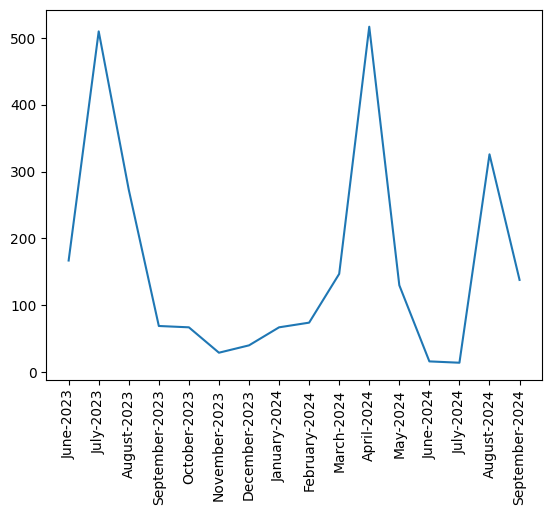

In [366]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show

In [367]:
df['only_date']=df['date'].dt.date

In [370]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

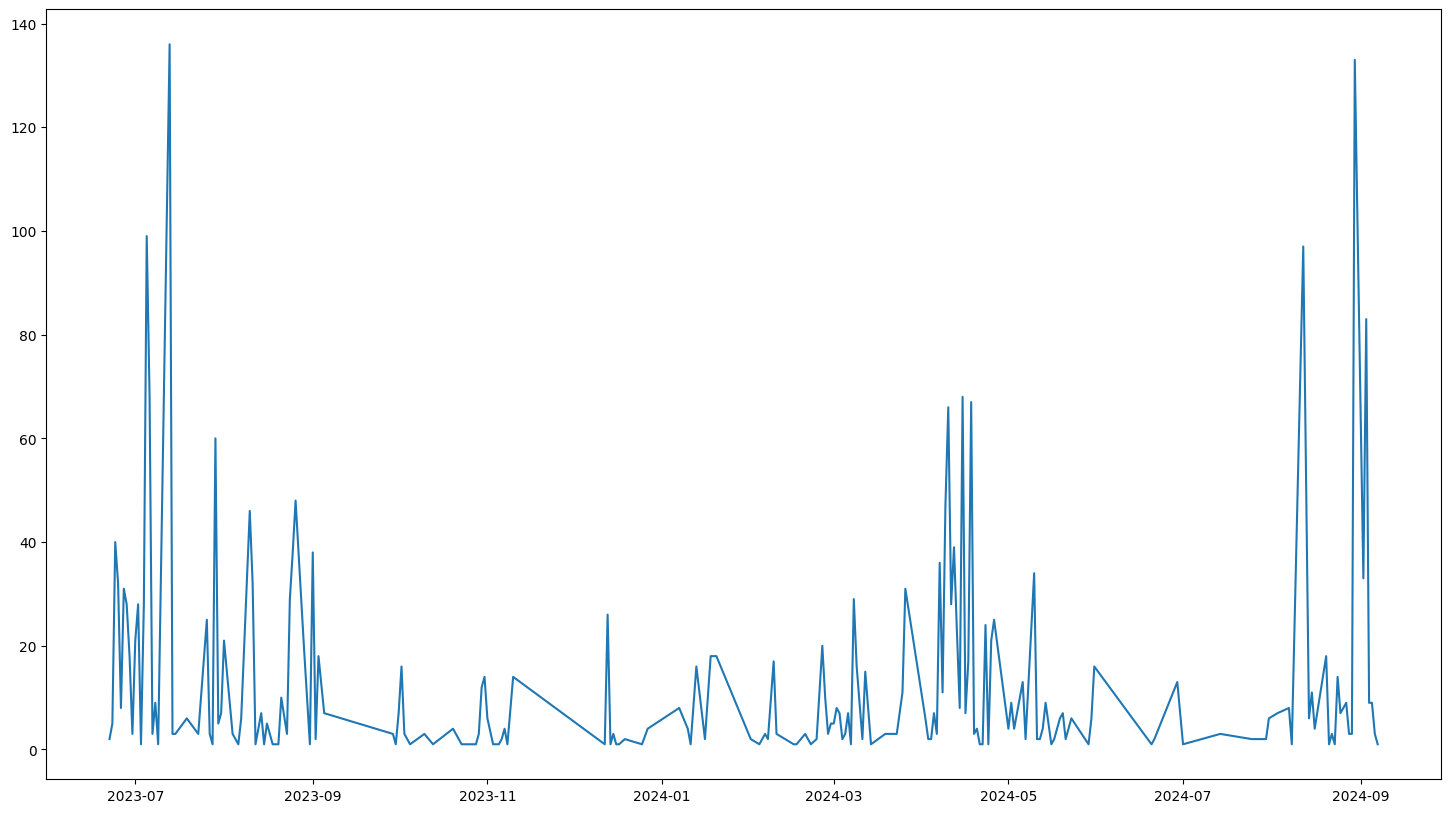

In [374]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [376]:
df['day_name'] = df['date'].dt.day_name()

In [378]:
df['day_name'].value_counts()

day_name
Thursday     504
Friday       478
Tuesday      413
Wednesday    347
Monday       341
Saturday     321
Sunday       180
Name: count, dtype: int64

In [379]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2023-06-22 10:41:44,group_notification,‎Messages and calls are end-to-end encrypted. ...,2023,June,22,10,41,6,2023-06-22,Thursday
1,2023-06-22 10:41:44,group_notification,‎Rajneesh Pathak IIEST created this group,2023,June,22,10,41,6,2023-06-22,Thursday
2,2023-06-23 11:23:13,group_notification,‎You joined using this group's invite link,2023,June,23,11,23,6,2023-06-23,Friday
3,2023-06-23 11:25:48,group_notification,‎Dheeraj Gaur CE IIEST joined using this group...,2023,June,23,11,25,6,2023-06-23,Friday
4,2023-06-23 11:34:36,group_notification,‎~ OINDRILA DAS 😁💬 joined using this group's i...,2023,June,23,11,34,6,2023-06-23,Friday


In [382]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [383]:
df['period']=period

In [384]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
1351,2024-03-08 23:07:29,Rajneesh Pathak IIEST,"Usme memorandum revise hote hain khali, baki s...",2024,March,8,23,7,3,2024-03-08,Friday,23-00
2552,2024-09-03 19:35:03,Sayandeep IIESTS,Ppt to nehi hua?\n,2024,September,3,19,35,9,2024-09-03,Tuesday,19-20
2393,2024-08-30 17:12:58,Rajashree Banerjee IIEST,Ajao sab\n,2024,August,30,17,12,8,2024-08-30,Friday,17-18
1082,2023-10-31 20:51:35,~ ~Nirala,For Accenture aptitude.\n,2023,October,31,20,51,10,2023-10-31,Tuesday,20-21
1526,2024-04-09 21:44:48,~ Surjya Kanta Sen,Many of us didn't even applied\n,2024,April,9,21,44,4,2024-04-09,Tuesday,21-22


In [385]:
!pip install seaborn

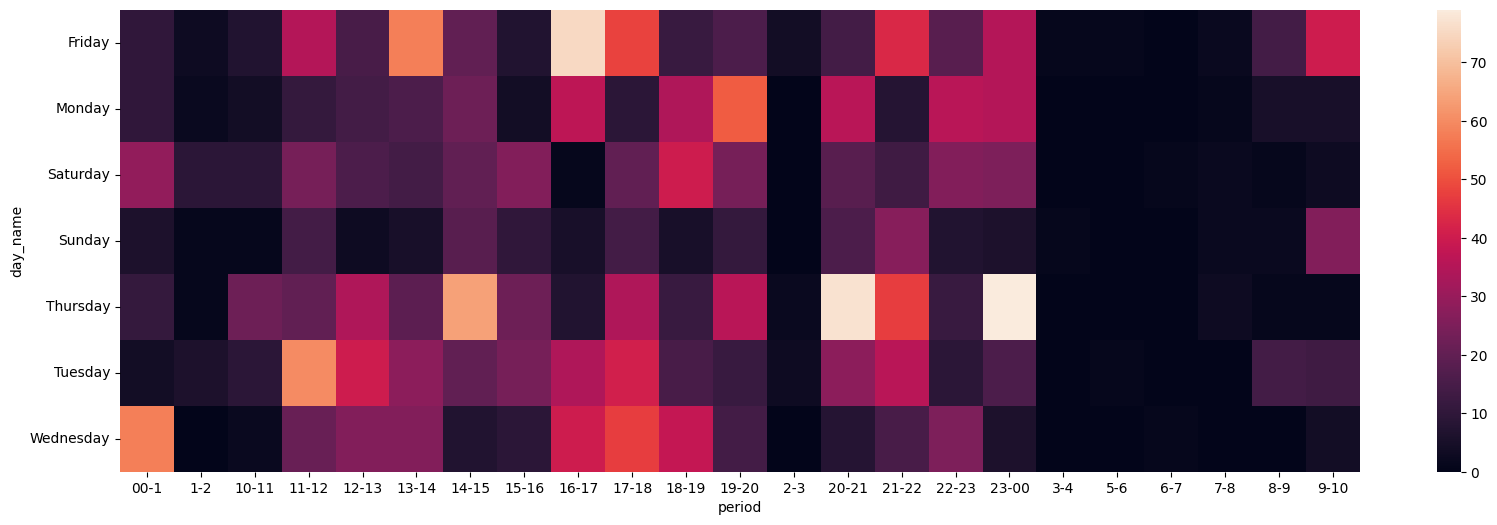

In [386]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [387]:
df.pivot_table(index='day_name', columns='period', values='message',aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,20-21,21-22,22-23,23-00,3-4,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,10.0,3.0,7.0,35.0,15.0,58.0,20.0,7.0,75.0,48.0,...,14.0,43.0,18.0,35.0,1.0,1.0,0.0,2.0,14.0,40.0
Monday,10.0,2.0,4.0,11.0,14.0,16.0,22.0,4.0,37.0,9.0,...,36.0,8.0,36.0,35.0,0.0,0.0,0.0,1.0,5.0,5.0
Saturday,29.0,9.0,9.0,24.0,16.0,14.0,20.0,26.0,1.0,20.0,...,18.0,13.0,26.0,25.0,0.0,0.0,1.0,2.0,1.0,3.0
Sunday,6.0,1.0,1.0,14.0,3.0,5.0,18.0,10.0,5.0,14.0,...,16.0,27.0,7.0,6.0,1.0,0.0,0.0,2.0,2.0,26.0
Thursday,11.0,1.0,22.0,20.0,34.0,19.0,64.0,22.0,7.0,34.0,...,77.0,47.0,12.0,79.0,0.0,0.0,0.0,3.0,1.0,1.0
Tuesday,4.0,6.0,9.0,60.0,40.0,28.0,20.0,24.0,34.0,41.0,...,28.0,36.0,9.0,16.0,0.0,1.0,0.0,0.0,14.0,13.0
Wednesday,58.0,0.0,2.0,21.0,26.0,26.0,7.0,9.0,40.0,47.0,...,8.0,15.0,25.0,6.0,0.0,0.0,1.0,0.0,0.0,4.0
